#### Check out the Notion for more Information ####
Notion page -> https://www.notion.so/Essence_of_Healthy_Stocks-18e0b9858ca88059afd2f08c9cd8e61f?pvs=4

This is the second process of the study !!!!

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as plt
from IPython.display import Image
from lib import functions


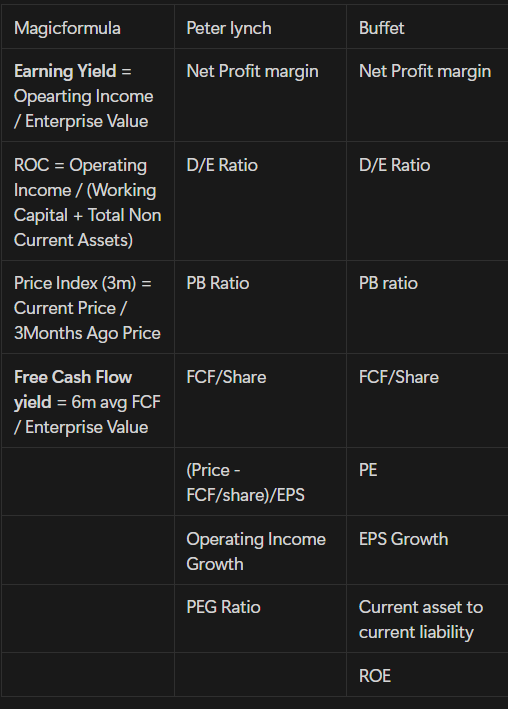

In [2]:
Image(filename='{6B164E19-AB08-4ECC-ADDC-80A486956487}.png')
## Here I categorize tasks into two groups ##
### 1) Common Indicators with No calculation  which are NPM, D/E Ratio, PB Ratio, PE Ratio and FCF/share. In addition, I need to scrap some basic information for the second task calculation as well.
### 2) Indicators with calculation which are the remainings.


In [3]:
## Firstly, let me build up a list of tickers ####
list_stock_th = pd.read_excel('list_tickers/stock_info_th.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df_list_stock_th = pd.DataFrame(list_stock_th['หลักทรัพย์'].astype('str') + '.bk')
df_list_stock_th['market'] = list_stock_th['ตลาด']
df_list_stock_th = df_list_stock_th.rename(columns={'หลักทรัพย์' : 'ticker'})
df_list_stock_th = df_list_stock_th.reset_index(drop=True)

list_stock_sp500 = pd.read_csv('list_tickers/stock_info_s&p500.csv')
df_list_stock_sp500 = pd.DataFrame(list_stock_sp500['Symbol'].astype('str'))
df_list_stock_sp500 = df_list_stock_sp500.rename(columns={'Symbol' : 'ticker'})
df_list_stock_sp500 = df_list_stock_sp500.drop_duplicates()
df_list_stock_sp500['market'] = 'sp500'

list_stock_us1 = pd.read_csv('list_tickers/stock_info_us_1.csv')
list_stock_us2 = pd.read_csv('list_tickers/stock_info_us_2.csv')

df_list_stock_us1 = pd.DataFrame(list_stock_us1['Symbol'].astype('str'))
df_list_stock_us = pd.concat([df_list_stock_us1,list_stock_us2['Symbol'].astype('str')])
df_list_stock_us = df_list_stock_us.rename(columns={'Symbol' : 'ticker'})
df_list_stock_us = df_list_stock_us.drop_duplicates()
df_list_stock_us['market'] = 'US'

df_list_stock_us_all = pd.concat([df_list_stock_sp500,df_list_stock_us])
df_list_stock_us_all = df_list_stock_us_all.drop_duplicates('ticker')
df_list_stock_us_all = df_list_stock_us_all.reset_index(drop=True)

df_list_stock = pd.concat([df_list_stock_th,df_list_stock_us_all])
df_list_stock = df_list_stock.reset_index(drop=True)

## For the sake of study, I filter out and take only stock in S and P 500 ##

stockmarket = 'US'
df_list_stock = df_list_stock.loc[df_list_stock['market'] == stockmarket]
df_list_stock = df_list_stock.reset_index(drop=True)

print(df_list_stock)

     ticker market
0      AACG     US
1      AADI     US
2      AAGR     US
3     AAGRW     US
4      AAME     US
...     ...    ...
6257    ZTO     US
6258    ZTR     US
6259    ZUO     US
6260   ZVIA     US
6261    ZWS     US

[6262 rows x 2 columns]


In [4]:
#### Now, we begin task1 ####

# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'enterpriseValue',
    'totalCashPerShare',
    'profitMargins',
    # 'trailingPE',
    # 'beta',
    # 'sharesOutstanding',
    'priceToBook',
    'debtToEquity',
    'returnOnEquity',
    'currentRatio',
    # 'trailingPegRatio',
    # 'currentPrice',
    'trailingEps'
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Non Current Assets',
    'Working Capital'
]
# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    # 'EBIT',
    'Operating Income'
]

# 5th acquiring information from .quarterly_cash_flow #
ttm_c = 2
cashflow_list = [
    'Free Cash Flow'
]

In [5]:
info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
cashflow_list_buffer = []
normalised_OI_index_list_buffer = []
average_MF_ROC_list_buffer = []
pricerelated_list_bugger = []

In [ ]:
# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()

for i in range(len(df_list_stock)) :
    print(i, "/", len(df_list_stock)-1 ,df_list_stock['ticker'][i])
    yfticker = yf.Ticker(df_list_stock['ticker'][i])
    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

    # 5th acquiring information from .quarterly_cashflow #
    cashflow_list_buffer_r = []
    for j in range(len(cashflow_list)):
        try:
            cashflow_list_buffer_r.append(np.array([yfticker.quarterly_cashflow.loc[yfticker.quarterly_cashflow.index == cashflow_list[j]].values[0][i] for i in range(ttm_c)]).mean())
        except:
            cashflow_list_buffer_r.append(None)

    cashflow_list_buffer.append(cashflow_list_buffer_r)
    
    ### get average_MF_ROC_list_buffer ####
    average_MF_ROC_list_r = []
    try:
        avg_mf_roc,avg_growth = functions.yfinance_average_ROI(df_list_stock['ticker'][i],'Operating Income')
        average_MF_ROC_list_r.append(avg_mf_roc)
        average_MF_ROC_list_r.append(avg_growth)
    except:
        average_MF_ROC_list_r.append(None)
        average_MF_ROC_list_r.append(None)

    average_MF_ROC_list_buffer.append(average_MF_ROC_list_r)

    #### Get indicators based on price #####
    if (df_list_stock['market'][i] == 'SET'):
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'mai') :
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'US') :
        market = "^GSPC"      
    else : market = "^GSPC" 
    pricerelated_list_bugger_r = []
    try:
        date_end = date.today()
        month_backward = -6
        date_start = functions.add_months(date_end, month_backward)
        beta, price_current, price_past = functions.finding_beta(market,df_list_stock['ticker'][i],date_start,date_end)

        pricerelated_list_bugger_r.append(beta)
        pricerelated_list_bugger_r.append(price_current)
        pricerelated_list_bugger_r.append(price_past)
    except:
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
    pricerelated_list_bugger.append(pricerelated_list_bugger_r)


financials_list.append('ttm_latest')
df_list_stock = df_list_stock.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df_list_stock = df_list_stock.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df_list_stock = df_list_stock.join(pd.DataFrame(financials_list_buffer, columns=financials_list))
df_list_stock = df_list_stock.join(pd.DataFrame(cashflow_list_buffer, columns=cashflow_list))
df_list_stock = df_list_stock.join(pd.DataFrame(average_MF_ROC_list_buffer, columns=['avg_MF_ROC','avg_growth']))
df_list_stock = df_list_stock.join(pd.DataFrame(pricerelated_list_bugger, columns=['beta','price_current','price_past']))

#### Drop NAN #############
df_list_stock = df_list_stock.dropna()
## we could notice that bakning/financial stocks would be filtered out since there accounting method is not the same as others 

df_list_stock = df_list_stock.reset_index(drop=True)


#### Now, we begin task2 ####
df_list_stock = df_list_stock.loc[df_list_stock['enterpriseValue'] != 0]
df_list_stock['MF_EarningYield'] = df_list_stock['Operating Income'] / df_list_stock['enterpriseValue']

df_list_stock['current_MF_ROC'] = df_list_stock['Operating Income'] / (df_list_stock['Working Capital'] + df_list_stock['Total Non Current Assets'])

df_list_stock['FCF_Yield'] = df_list_stock['Free Cash Flow'] / df_list_stock['enterpriseValue']

df_list_stock['PE_offset_Cash'] = (df_list_stock['price_current'] - df_list_stock['totalCashPerShare']) / df_list_stock['trailingEps']

df_list_stock['PE'] = (df_list_stock['price_current']) / df_list_stock['trailingEps']
df_list_stock['PEG'] = df_list_stock['PE']/(df_list_stock['avg_growth']*100)

df_list_stock['PriceIndex_6m'] = df_list_stock['price_current']/df_list_stock['price_past']
df_list_stock['percenFCFpersharetoprice'] = (df_list_stock['totalCashPerShare'])/df_list_stock['price_current']



#### Unrelated columns #### 
# df_list_stock = df_list_stock.drop(columns=['enterpriseValue','Total Non Current Assets','Working Capital','Operating Income','Free Cash Flow','totalCashPerShare','ttm_latest','price_current','price_past'])

df_list_stock.to_csv('df_list_stock_' + stockmarket +'.csv',index= False)

0 / 6261 AACG
1 / 6261 AADI
2 / 6261 AAGR
3 / 6261 AAGRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


4 / 6261 AAME
5 / 6261 AAOI
6 / 6261 AAON
7 / 6261 ABAT
8 / 6261 ABCL
9 / 6261 ABEO
10 / 6261 ABIO


$ABIO: possibly delisted; no timezone found


11 / 6261 ABL
12 / 6261 ABLLL
13 / 6261 ABLLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


14 / 6261 ABLV
15 / 6261 ABOS
16 / 6261 ABSI
17 / 6261 ABTS
18 / 6261 ABUS
19 / 6261 ABVC
20 / 6261 ABVE
21 / 6261 ABVEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


22 / 6261 ABVX
23 / 6261 ACAB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACAB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACAB&crumb=BwigKI9CrH9
$ACAB: possibly delisted; no timezone found


24 / 6261 ACABU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACABU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACABU&crumb=BwigKI9CrH9
$ACABU: possibly delisted; no timezone found


25 / 6261 ACABW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACABW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACABW&crumb=BwigKI9CrH9
$ACABW: possibly delisted; no timezone found


26 / 6261 ACAC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACAC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACAC&crumb=BwigKI9CrH9
$ACAC: possibly delisted; no timezone found


27 / 6261 ACAD
28 / 6261 ACB
29 / 6261 ACCD
30 / 6261 ACDC
31 / 6261 ACET
32 / 6261 ACGLN
33 / 6261 ACGLO
34 / 6261 ACHC
35 / 6261 ACHL
36 / 6261 ACHV
37 / 6261 ACIC
38 / 6261 ACIU
39 / 6261 ACIW
40 / 6261 ACLS
41 / 6261 ACLX
42 / 6261 ACMR
43 / 6261 ACNB
44 / 6261 ACNT
45 / 6261 ACON
46 / 6261 ACONW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


47 / 6261 ACRS
48 / 6261 ACRV
49 / 6261 ACST


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ACST?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ACST&crumb=BwigKI9CrH9
$ACST: possibly delisted; no timezone found


50 / 6261 ACT
51 / 6261 ACTG
52 / 6261 ACTU
53 / 6261 ACVA
54 / 6261 ACXP
55 / 6261 ADAG
56 / 6261 ADAP
57 / 6261 ADD
58 / 6261 ADEA
59 / 6261 ADGM
60 / 6261 ADIL
61 / 6261 ADMA
62 / 6261 ADN
63 / 6261 ADNWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


64 / 6261 ADPT
65 / 6261 ADSE
66 / 6261 ADSEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


67 / 6261 ADTN
68 / 6261 ADTX
69 / 6261 ADUS
70 / 6261 ADV
71 / 6261 ADVM
72 / 6261 ADVWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


73 / 6261 ADXN
74 / 6261 AEAE
75 / 6261 AEAEU
76 / 6261 AEAEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


77 / 6261 AEHL
78 / 6261 AEHR
79 / 6261 AEI
80 / 6261 AEIS
81 / 6261 AEMD
82 / 6261 AENT
83 / 6261 AERT
84 / 6261 AEYE
85 / 6261 AFBI
86 / 6261 AFCG
87 / 6261 AFJK
88 / 6261 AFMD
89 / 6261 AFRI
90 / 6261 AFRIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


91 / 6261 AFRM
92 / 6261 AFYA
93 / 6261 AGAE
94 / 6261 AGBA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGBA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGBA&crumb=BwigKI9CrH9
$AGBA: possibly delisted; no timezone found


95 / 6261 AGBAW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGBAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGBAW&crumb=BwigKI9CrH9
$AGBAW: possibly delisted; no timezone found


96 / 6261 AGEN
97 / 6261 AGFY
98 / 6261 AGIO
99 / 6261 AGMH
100 / 6261 AGNC
101 / 6261 AGNCL
102 / 6261 AGNCM
103 / 6261 AGNCN
104 / 6261 AGNCO
105 / 6261 AGNCP
106 / 6261 AGRI
107 / 6261 AGYS
108 / 6261 AHCO
109 / 6261 AHG
110 / 6261 AIEV
111 / 6261 AIFF
112 / 6261 AIHS
113 / 6261 AILE
114 / 6261 AILEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


115 / 6261 AIMBU
116 / 6261 AIMD
117 / 6261 AIOT
118 / 6261 AIP
119 / 6261 AIRE
120 / 6261 AIRG
121 / 6261 AIRJ
122 / 6261 AIRJW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


123 / 6261 AIRS
124 / 6261 AIRT
125 / 6261 AIRTP
126 / 6261 AISP
127 / 6261 AISPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


128 / 6261 AITR
129 / 6261 AITRR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


130 / 6261 AITRU
131 / 6261 AIXI
132 / 6261 AKAN
133 / 6261 AKBA
134 / 6261 AKRO
135 / 6261 AKTS
136 / 6261 AKTX
137 / 6261 AKYA
138 / 6261 ALAB
139 / 6261 ALAR
140 / 6261 ALBT
141 / 6261 ALCE
142 / 6261 ALCO
143 / 6261 ALCY
144 / 6261 ALCYW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


145 / 6261 ALDX
146 / 6261 ALEC
147 / 6261 ALF
148 / 6261 ALFUU
149 / 6261 ALFUW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


150 / 6261 ALGM
151 / 6261 ALGS
152 / 6261 ALGT
153 / 6261 ALHC
154 / 6261 ALIM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALIM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ALIM&crumb=BwigKI9CrH9
$ALIM: possibly delisted; no timezone found


155 / 6261 ALKS
156 / 6261 ALKT
157 / 6261 ALLK
158 / 6261 ALLO
159 / 6261 ALLR
160 / 6261 ALLT
161 / 6261 ALMS
162 / 6261 ALNT
163 / 6261 ALNY
164 / 6261 ALOT
165 / 6261 ALPP
166 / 6261 ALRM
167 / 6261 ALRN
168 / 6261 ALRS
169 / 6261 ALSA
170 / 6261 ALSAU
171 / 6261 ALSAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


172 / 6261 ALT
173 / 6261 ALTI
174 / 6261 ALTO
175 / 6261 ALTR
176 / 6261 ALTS
177 / 6261 ALVO
178 / 6261 ALVOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


179 / 6261 ALVR
180 / 6261 ALXO
181 / 6261 ALZN
182 / 6261 AMAL
183 / 6261 AMBA
184 / 6261 AMCX
185 / 6261 AMED
186 / 6261 AMIX
187 / 6261 AMKR
188 / 6261 AMLI
189 / 6261 AMLX
190 / 6261 AMPG
191 / 6261 AMPH
192 / 6261 AMPL
193 / 6261 AMRK
194 / 6261 AMRN
195 / 6261 AMRX
196 / 6261 AMSC
197 / 6261 AMSF
198 / 6261 AMST
199 / 6261 AMSWA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMSWA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMSWA&crumb=BwigKI9CrH9
$AMSWA: possibly delisted; no timezone found


200 / 6261 AMTX
201 / 6261 AMWD
202 / 6261 ANAB
203 / 6261 ANDE
204 / 6261 ANEB
205 / 6261 ANGH
206 / 6261 ANGI
207 / 6261 ANGO
208 / 6261 ANIK
209 / 6261 ANIP
210 / 6261 ANIX
211 / 6261 ANL
212 / 6261 ANNX
213 / 6261 ANSC
214 / 6261 ANSCW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


215 / 6261 ANTE
216 / 6261 ANTX
217 / 6261 ANY
218 / 6261 AOGO
219 / 6261 AOGOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


220 / 6261 AOSL
221 / 6261 AOUT
222 / 6261 APCX
223 / 6261 APCXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


224 / 6261 APDN
225 / 6261 APEI
226 / 6261 APGE
227 / 6261 API
228 / 6261 APLD
229 / 6261 APLM
230 / 6261 APLMW
231 / 6261 APLS
232 / 6261 APLT
233 / 6261 APM
234 / 6261 APOG
235 / 6261 APP
236 / 6261 APPF
237 / 6261 APPN
238 / 6261 APPS
239 / 6261 APRE
240 / 6261 APTO
241 / 6261 APVO
242 / 6261 APWC
243 / 6261 APXI
244 / 6261 APYX
245 / 6261 AQB
246 / 6261 AQMS
247 / 6261 AQST
248 / 6261 AQU
249 / 6261 AQUNU
250 / 6261 ARAY
251 / 6261 ARBB
252 / 6261 ARBE
253 / 6261 ARBEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


254 / 6261 ARBK
255 / 6261 ARBKL
256 / 6261 ARCB
257 / 6261 ARCC
258 / 6261 ARCT
259 / 6261 ARDX
260 / 6261 AREB
261 / 6261 AREBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


262 / 6261 AREC
263 / 6261 ARGX
264 / 6261 ARHS
265 / 6261 ARKO
266 / 6261 ARKOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


267 / 6261 ARKR
268 / 6261 ARLP
269 / 6261 ARM
270 / 6261 AROW
271 / 6261 ARQ
272 / 6261 ARQQ
273 / 6261 ARQQW
274 / 6261 ARQT
275 / 6261 ARRY
276 / 6261 ARTL
277 / 6261 ARTNA
278 / 6261 ARTV
279 / 6261 ARTW
280 / 6261 ARVN
281 / 6261 ARWR
282 / 6261 ASCB
283 / 6261 ASCBU
284 / 6261 ASCBW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


285 / 6261 ASLE
286 / 6261 ASMB
287 / 6261 ASML
288 / 6261 ASND
289 / 6261 ASNS
290 / 6261 ASO
291 / 6261 ASPI
292 / 6261 ASPS
293 / 6261 ASRT
294 / 6261 ASRV
295 / 6261 ASST
296 / 6261 ASTC
297 / 6261 ASTE
298 / 6261 ASTH
299 / 6261 ASTI
300 / 6261 ASTL
301 / 6261 ASTLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


302 / 6261 ASTS
303 / 6261 ASTSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


304 / 6261 ASUR
305 / 6261 ASYS
306 / 6261 ATAI
307 / 6261 ATAT
308 / 6261 ATCOL
309 / 6261 ATEC
310 / 6261 ATER
311 / 6261 ATEX
312 / 6261 ATGL
313 / 6261 ATHA
314 / 6261 ATHE
315 / 6261 ATIF
316 / 6261 ATLC
317 / 6261 ATLCL
318 / 6261 ATLCP
319 / 6261 ATLCZ
320 / 6261 ATLO
321 / 6261 ATLX
322 / 6261 ATMC
323 / 6261 ATMV
324 / 6261 ATMVR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


325 / 6261 ATNF
326 / 6261 ATNFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


327 / 6261 ATNI
328 / 6261 ATOM
329 / 6261 ATOS
330 / 6261 ATPC
331 / 6261 ATRA
332 / 6261 ATRC
333 / 6261 ATRI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATRI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATRI&crumb=BwigKI9CrH9
$ATRI: possibly delisted; no timezone found


334 / 6261 ATRO
335 / 6261 ATSG
336 / 6261 ATXG
337 / 6261 ATXI
338 / 6261 ATXS
339 / 6261 ATYR
340 / 6261 AUBN
341 / 6261 AUDC
342 / 6261 AUGX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AUGX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AUGX&crumb=BwigKI9CrH9
$AUGX: possibly delisted; no timezone found


343 / 6261 AUID
344 / 6261 AUPH
345 / 6261 AUR
346 / 6261 AURA
347 / 6261 AUROW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


348 / 6261 AUTL
349 / 6261 AUUD
350 / 6261 AVAH
351 / 6261 AVAV
352 / 6261 AVBP
353 / 6261 AVDL
354 / 6261 AVDX
355 / 6261 AVGR
356 / 6261 AVIR
357 / 6261 AVNW
358 / 6261 AVO
359 / 6261 AVPT
360 / 6261 AVPTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


361 / 6261 AVT
362 / 6261 AVTE
363 / 6261 AVTX
364 / 6261 AVXL
365 / 6261 AWH
366 / 6261 AWRE
367 / 6261 AXDX
368 / 6261 AXGN
369 / 6261 AXNX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AXNX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AXNX&crumb=BwigKI9CrH9
$AXNX: possibly delisted; no timezone found


370 / 6261 AXSM
371 / 6261 AXTI
372 / 6261 AY
373 / 6261 AYRO
374 / 6261 AYTU
375 / 6261 AZ
376 / 6261 AZN
377 / 6261 AZPN
378 / 6261 AZTA
379 / 6261 BACK
380 / 6261 BAER
381 / 6261 BAFN
382 / 6261 BAND
383 / 6261 BANF
384 / 6261 BANFP
385 / 6261 BANL
386 / 6261 BANR
387 / 6261 BANX
388 / 6261 BAOS
389 / 6261 BASE
390 / 6261 BATRA
391 / 6261 BATRK
392 / 6261 BAYA
393 / 6261 BAYAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


394 / 6261 BAYAU
395 / 6261 BBCP
396 / 6261 BBGI
397 / 6261 BBIO
398 / 6261 BBLG
399 / 6261 BBSI
400 / 6261 BCAB
401 / 6261 BCAL
402 / 6261 BCAN
403 / 6261 BCBP
404 / 6261 BCDA
405 / 6261 BCG
406 / 6261 BCGWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


407 / 6261 BCLI
408 / 6261 BCML
409 / 6261 BCOV
410 / 6261 BCOW
411 / 6261 BCPC
412 / 6261 BCRX
413 / 6261 BCSA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSA&crumb=BwigKI9CrH9
$BCSA: possibly delisted; no timezone found


414 / 6261 BCSAU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSAU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSAU&crumb=BwigKI9CrH9
$BCSAU: possibly delisted; no timezone found


415 / 6261 BCSAW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BCSAW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BCSAW&crumb=BwigKI9CrH9
$BCSAW: possibly delisted; no timezone found


416 / 6261 BCTX
417 / 6261 BCTXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


418 / 6261 BCYC
419 / 6261 BDRX
420 / 6261 BDSX
421 / 6261 BDTX
422 / 6261 BEAM
423 / 6261 BEAT
424 / 6261 BEATW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


425 / 6261 BECN
426 / 6261 BEEM
427 / 6261 BELFA
428 / 6261 BELFB
429 / 6261 BENF
430 / 6261 BENFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


431 / 6261 BETR
432 / 6261 BETRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


433 / 6261 BFC
434 / 6261 BFI
435 / 6261 BFIIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BFIIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BFIIW&crumb=BwigKI9CrH9
$BFIIW: possibly delisted; no timezone found


436 / 6261 BFIN
437 / 6261 BFRG
438 / 6261 BFRGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


439 / 6261 BFRI
440 / 6261 BFRIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


441 / 6261 BFST
442 / 6261 BGC
443 / 6261 BGFV
444 / 6261 BGLC
445 / 6261 BGM
446 / 6261 BGNE
447 / 6261 BGXX
448 / 6261 BHAC
449 / 6261 BHACW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


450 / 6261 BHAT
451 / 6261 BHF
452 / 6261 BHFAL
453 / 6261 BHFAM
454 / 6261 BHFAN
455 / 6261 BHFAO
456 / 6261 BHFAP
457 / 6261 BHRB
458 / 6261 BIAF
459 / 6261 BIAFW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


460 / 6261 BIDU
461 / 6261 BIGC
462 / 6261 BILI
463 / 6261 BIMI
464 / 6261 BIOR
465 / 6261 BIOX
466 / 6261 BIRD
467 / 6261 BITF
468 / 6261 BIVI
469 / 6261 BJDX
470 / 6261 BJRI
471 / 6261 BKHA
472 / 6261 BKHAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


473 / 6261 BKHAU
474 / 6261 BKYI
475 / 6261 BL
476 / 6261 BLAC
477 / 6261 BLACU
478 / 6261 BLBD
479 / 6261 BLBX
480 / 6261 BLDE
481 / 6261 BLDEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


482 / 6261 BLDP
483 / 6261 BLEU
484 / 6261 BLEUR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BLEUR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BLEUR&crumb=BwigKI9CrH9
$BLEUR: possibly delisted; no timezone found


485 / 6261 BLFS
486 / 6261 BLFY
487 / 6261 BLIN
488 / 6261 BLKB
489 / 6261 BLMN
490 / 6261 BLMZ
491 / 6261 BLNK
492 / 6261 BLRX
493 / 6261 BLTE
494 / 6261 BLUE
495 / 6261 BLZE
496 / 6261 BMBL
497 / 6261 BMEA
498 / 6261 BMR
499 / 6261 BMRA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BMRA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BMRA&crumb=Edge%3A+Too+Many+Requests


500 / 6261 BMRC


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BMRC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BMRC&crumb=Edge%3A+Too+Many+Requests


501 / 6261 BMRN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BMRN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BMRN&crumb=Edge%3A+Too+Many+Requests


502 / 6261 BNAI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNAI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNAI&crumb=Edge%3A+Too+Many+Requests


503 / 6261 BNAIW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNAIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNAIW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


504 / 6261 BNGO


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNGO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNGO&crumb=Edge%3A+Too+Many+Requests


505 / 6261 BNIX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNIX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNIX&crumb=Edge%3A+Too+Many+Requests


506 / 6261 BNIXR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNIXR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNIXR&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


507 / 6261 BNOX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNOX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNOX&crumb=Edge%3A+Too+Many+Requests


508 / 6261 BNR


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNR&crumb=Edge%3A+Too+Many+Requests


509 / 6261 BNRG


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNRG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNRG&crumb=Edge%3A+Too+Many+Requests


510 / 6261 BNTC


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNTC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNTC&crumb=Edge%3A+Too+Many+Requests


511 / 6261 BNTX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNTX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNTX&crumb=Edge%3A+Too+Many+Requests


512 / 6261 BNZI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BNZI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BNZI&crumb=Edge%3A+Too+Many+Requests


513 / 6261 BOCN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOCN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOCN&crumb=Edge%3A+Too+Many+Requests


514 / 6261 BOCNW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOCNW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOCNW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


515 / 6261 BOF


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOF&crumb=Edge%3A+Too+Many+Requests


516 / 6261 BOKF


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOKF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOKF&crumb=Edge%3A+Too+Many+Requests


517 / 6261 BOLD


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOLD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOLD&crumb=Edge%3A+Too+Many+Requests


518 / 6261 BOLT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOLT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOLT&crumb=Edge%3A+Too+Many+Requests


519 / 6261 BON


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BON?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BON&crumb=Edge%3A+Too+Many+Requests


520 / 6261 BOOM


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOOM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOOM&crumb=Edge%3A+Too+Many+Requests


521 / 6261 BOSC


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BOSC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BOSC&crumb=Edge%3A+Too+Many+Requests


522 / 6261 BOTJ
523 / 6261 BOWN
524 / 6261 BOWNR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


525 / 6261 BOXL
526 / 6261 BPMC
527 / 6261 BPOP
528 / 6261 BPOPM
529 / 6261 BPRN
530 / 6261 BPTH
531 / 6261 BPYPM
532 / 6261 BPYPN
533 / 6261 BPYPO
534 / 6261 BPYPP
535 / 6261 BRAC
536 / 6261 BRAG
537 / 6261 BREA
538 / 6261 BRFH
539 / 6261 BRID
540 / 6261 BRKH
541 / 6261 BRKHU
542 / 6261 BRKHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


543 / 6261 BRKL
544 / 6261 BRKR
545 / 6261 BRLS
546 / 6261 BRLSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


547 / 6261 BRLT
548 / 6261 BRNS
549 / 6261 BROG
550 / 6261 BROGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


551 / 6261 BRTX
552 / 6261 BRY
553 / 6261 BRZE
554 / 6261 BSBK
555 / 6261 BSET
556 / 6261 BSFC
557 / 6261 BSLK
558 / 6261 BSLKW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


559 / 6261 BSRR
560 / 6261 BSVN
561 / 6261 BSY
562 / 6261 BTAI
563 / 6261 BTBD
564 / 6261 BTBDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


565 / 6261 BTBT
566 / 6261 BTCS
567 / 6261 BTCT
568 / 6261 BTCTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


569 / 6261 BTDR
570 / 6261 BTM
571 / 6261 BTMD
572 / 6261 BTMWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


573 / 6261 BTOC
574 / 6261 BTOG
575 / 6261 BTSG
576 / 6261 BTSGU
577 / 6261 BUJA
578 / 6261 BUJAR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


579 / 6261 BUJAU
580 / 6261 BUJAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


581 / 6261 BUSE
582 / 6261 BVFL
583 / 6261 BVS
584 / 6261 BWAY
585 / 6261 BWB
586 / 6261 BWBBP
587 / 6261 BWEN
588 / 6261 BWFG
589 / 6261 BWIN
590 / 6261 BWMN
591 / 6261 BYFC
592 / 6261 BYND
593 / 6261 BYNO
594 / 6261 BYNOU
595 / 6261 BYNOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


596 / 6261 BYRN
597 / 6261 BYSI
598 / 6261 BYU
599 / 6261 BZ
600 / 6261 BZFD
601 / 6261 BZFDW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


602 / 6261 BZUN
603 / 6261 CAAS
604 / 6261 CABA
605 / 6261 CAC
606 / 6261 CACC
607 / 6261 CACO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CACO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CACO&crumb=BwigKI9CrH9
$CACO: possibly delisted; no timezone found


608 / 6261 CADL
609 / 6261 CAKE
610 / 6261 CALC
611 / 6261 CALM
612 / 6261 CALT


$CALT: possibly delisted; no timezone found


613 / 6261 CAMT
614 / 6261 CAN
615 / 6261 CAPR
616 / 6261 CAPT
617 / 6261 CAPTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


618 / 6261 CAR
619 / 6261 CARA
620 / 6261 CARE
621 / 6261 CARG
622 / 6261 CARM
623 / 6261 CART
624 / 6261 CARV
625 / 6261 CASH
626 / 6261 CASI
627 / 6261 CASS
628 / 6261 CASY
629 / 6261 CATY
630 / 6261 CBAN
631 / 6261 CBAT
632 / 6261 CBFV
633 / 6261 CBNK
634 / 6261 CBRG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CBRG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CBRG&crumb=BwigKI9CrH9
$CBRG: possibly delisted; no timezone found


635 / 6261 CBRL
636 / 6261 CBSH
637 / 6261 CBUS
638 / 6261 CCAP
639 / 6261 CCB
640 / 6261 CCBG
641 / 6261 CCCC
642 / 6261 CCCS
643 / 6261 CCD
644 / 6261 CCEP
645 / 6261 CCG
646 / 6261 CCGWW
647 / 6261 CCIX
648 / 6261 CCIXU
649 / 6261 CCIXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


650 / 6261 CCLD
651 / 6261 CCLDO
652 / 6261 CCLDP
653 / 6261 CCNE
654 / 6261 CCNEP
655 / 6261 CCOI
656 / 6261 CCRN
657 / 6261 CCSI
658 / 6261 CCTG
659 / 6261 CCTS
660 / 6261 CCTSW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CCTSW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CCTSW&crumb=BwigKI9CrH9
$CCTSW: possibly delisted; no timezone found


661 / 6261 CDAQ


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDAQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDAQ&crumb=BwigKI9CrH9
$CDAQ: possibly delisted; no timezone found


662 / 6261 CDIO
663 / 6261 CDIOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


664 / 6261 CDLX
665 / 6261 CDMO
666 / 6261 CDNA
667 / 6261 CDRO
668 / 6261 CDROW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


669 / 6261 CDT
670 / 6261 CDTG
671 / 6261 CDTX
672 / 6261 CDXC
673 / 6261 CDXS
674 / 6261 CDZI


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDZI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDZI&crumb=Edge%3A+Too+Many+Requests


675 / 6261 CDZIP


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDZIP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDZIP&crumb=Edge%3A+Too+Many+Requests


676 / 6261 CEAD


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CEAD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CEAD&crumb=Edge%3A+Too+Many+Requests


677 / 6261 CECO


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CECO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CECO&crumb=Edge%3A+Too+Many+Requests


678 / 6261 CELC


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CELC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CELC&crumb=Edge%3A+Too+Many+Requests


679 / 6261 CELH


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CELH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CELH&crumb=Edge%3A+Too+Many+Requests


680 / 6261 CELU


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CELU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CELU&crumb=Edge%3A+Too+Many+Requests


681 / 6261 CELUW


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CELUW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CELUW&crumb=Edge%3A+Too+Many+Requests
d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


682 / 6261 CELZ


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CELZ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CELZ&crumb=Edge%3A+Too+Many+Requests


683 / 6261 CENN


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CENN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CENN&crumb=Edge%3A+Too+Many+Requests


684 / 6261 CENT


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CENT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CENT&crumb=Edge%3A+Too+Many+Requests


685 / 6261 CENTA


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CENTA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CENTA&crumb=Edge%3A+Too+Many+Requests


686 / 6261 CENX


401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CENX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CENX&crumb=Edge%3A+Too+Many+Requests


687 / 6261 CEP
688 / 6261 CERO
689 / 6261 CERS
690 / 6261 CERT
691 / 6261 CETX
692 / 6261 CETY
693 / 6261 CEVA
694 / 6261 CFB
695 / 6261 CFBK
696 / 6261 CFFI
697 / 6261 CFFN
698 / 6261 CFFSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


699 / 6261 CFLT
700 / 6261 CFSB
701 / 6261 CG
702 / 6261 CGABL
703 / 6261 CGBD
704 / 6261 CGBDL
705 / 6261 CGBS
706 / 6261 CGBSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


707 / 6261 CGC
708 / 6261 CGEM
709 / 6261 CGEN
710 / 6261 CGNT
711 / 6261 CGNX
712 / 6261 CGO
713 / 6261 CGON
714 / 6261 CGTX
715 / 6261 CHCI
716 / 6261 CHCO
717 / 6261 CHDN
718 / 6261 CHEF
719 / 6261 CHEK
720 / 6261 CHI
721 / 6261 CHK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHK&crumb=BwigKI9CrH9
$CHK: possibly delisted; no timezone found


722 / 6261 CHKEL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHKEL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHKEL&crumb=BwigKI9CrH9
$CHKEL: possibly delisted; no timezone found


723 / 6261 CHKEW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHKEW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHKEW&crumb=BwigKI9CrH9
$CHKEW: possibly delisted; no timezone found


724 / 6261 CHKP
725 / 6261 CHMG
726 / 6261 CHNR
727 / 6261 CHR
728 / 6261 CHRD
729 / 6261 CHRS
730 / 6261 CHSCL
731 / 6261 CHSCM
732 / 6261 CHSCN
733 / 6261 CHSCO
734 / 6261 CHSCP
735 / 6261 CHSN
736 / 6261 CHUY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CHUY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CHUY&crumb=BwigKI9CrH9
$CHUY: possibly delisted; no timezone found


737 / 6261 CHW
738 / 6261 CHX
739 / 6261 CHY
740 / 6261 CIFR
741 / 6261 CIFRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


742 / 6261 CIGI
743 / 6261 CING
744 / 6261 CINGW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


745 / 6261 CISO
746 / 6261 CISS
747 / 6261 CITEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


748 / 6261 CIVB
749 / 6261 CJET
750 / 6261 CJJD
751 / 6261 CKPT
752 / 6261 CLAR
753 / 6261 CLBK
754 / 6261 CLBT
755 / 6261 CLBTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


756 / 6261 CLDX
757 / 6261 CLEU
758 / 6261 CLFD
759 / 6261 CLGN
760 / 6261 CLIR
761 / 6261 CLLS
762 / 6261 CLMB
763 / 6261 CLMT
764 / 6261 CLNE
765 / 6261 CLNN
766 / 6261 CLNNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


767 / 6261 CLOE
768 / 6261 CLOER


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


769 / 6261 CLOEU
770 / 6261 CLOV
771 / 6261 CLPS
772 / 6261 CLPT
773 / 6261 CLRB
774 / 6261 CLRC
775 / 6261 CLRCR


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


776 / 6261 CLRCU
777 / 6261 CLRO
778 / 6261 CLSD
779 / 6261 CLSK
780 / 6261 CLST
781 / 6261 CLWT
782 / 6261 CMAX
783 / 6261 CMAXW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CMAXW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CMAXW&crumb=BwigKI9CrH9
$CMAXW: possibly delisted; no timezone found


784 / 6261 CMBM
785 / 6261 CMCO
786 / 6261 CMCT
787 / 6261 CMLS
788 / 6261 CMMB
789 / 6261 CMND
790 / 6261 CMPO
791 / 6261 CMPOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


792 / 6261 CMPR
793 / 6261 CMPS
794 / 6261 CMPX
795 / 6261 CMRX
796 / 6261 CMTL
797 / 6261 CNDT
798 / 6261 CNET
799 / 6261 CNEY
800 / 6261 CNFR
801 / 6261 CNFRZ
802 / 6261 CNOB
803 / 6261 CNOBP
804 / 6261 CNSL
805 / 6261 CNSP
806 / 6261 CNTA
807 / 6261 CNTB
808 / 6261 CNTM
809 / 6261 CNTX
810 / 6261 CNTY
811 / 6261 CNVS
812 / 6261 CNXC
813 / 6261 CNXN
814 / 6261 COCH
815 / 6261 COCHW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


816 / 6261 COCO
817 / 6261 COCP
818 / 6261 CODA
819 / 6261 CODX
820 / 6261 COEP
821 / 6261 COEPW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


822 / 6261 COFS
823 / 6261 COGT
824 / 6261 COHU
825 / 6261 COIN
826 / 6261 COKE
827 / 6261 COLB
828 / 6261 COLL
829 / 6261 COLM
830 / 6261 COMM
831 / 6261 COOP
832 / 6261 COOT
833 / 6261 COOTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


834 / 6261 CORT
835 / 6261 CORZ
836 / 6261 CORZW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


837 / 6261 CORZZ


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


838 / 6261 COSM
839 / 6261 COYA
840 / 6261 CPBI
841 / 6261 CPHC
842 / 6261 CPIX
843 / 6261 CPLP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CPLP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CPLP&crumb=BwigKI9CrH9
$CPLP: possibly delisted; no timezone found


844 / 6261 CPOP
845 / 6261 CPRX
846 / 6261 CPSH
847 / 6261 CPSS
848 / 6261 CPTN
849 / 6261 CPTNW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


850 / 6261 CPZ
851 / 6261 CRAI
852 / 6261 CRBP
853 / 6261 CRBU
854 / 6261 CRCT
855 / 6261 CRDF
856 / 6261 CRDL
857 / 6261 CRDO
858 / 6261 CREG
859 / 6261 CRESW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


860 / 6261 CRESY
861 / 6261 CREV
862 / 6261 CREVW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


863 / 6261 CREX
864 / 6261 CRGO
865 / 6261 CRGOW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


866 / 6261 CRGX
867 / 6261 CRIS
868 / 6261 CRKN
869 / 6261 CRMD
870 / 6261 CRML
871 / 6261 CRMLW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


872 / 6261 CRMT
873 / 6261 CRNC
874 / 6261 CRNT
875 / 6261 CRNX
876 / 6261 CRON
877 / 6261 CROX
878 / 6261 CRSP
879 / 6261 CRSR
880 / 6261 CRTO
881 / 6261 CRUS
882 / 6261 CRVL
883 / 6261 CRVO
884 / 6261 CRVS
885 / 6261 CRWS
886 / 6261 CSBR
887 / 6261 CSCI
888 / 6261 CSGS
889 / 6261 CSIQ
890 / 6261 CSLM
891 / 6261 CSLMU
892 / 6261 CSLMW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


893 / 6261 CSLR
894 / 6261 CSLRW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


895 / 6261 CSPI
896 / 6261 CSQ
897 / 6261 CSTE
898 / 6261 CSTL
899 / 6261 CSWC
900 / 6261 CSWCZ
901 / 6261 CSWI
902 / 6261 CTBI
903 / 6261 CTCX
904 / 6261 CTCXW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


905 / 6261 CTHR
906 / 6261 CTKB
907 / 6261 CTLP
908 / 6261 CTMX
909 / 6261 CTNM
910 / 6261 CTNT
911 / 6261 CTOR
912 / 6261 CTRM
913 / 6261 CTRN
914 / 6261 CTSO
915 / 6261 CTXR
916 / 6261 CUB
917 / 6261 CUBA
918 / 6261 CUBWU
919 / 6261 CUBWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


920 / 6261 CUE
921 / 6261 CURI
922 / 6261 CURIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


923 / 6261 CUTR
924 / 6261 CVAC
925 / 6261 CVBF
926 / 6261 CVCO
927 / 6261 CVGI
928 / 6261 CVGW
929 / 6261 CVII


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVII?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVII&crumb=BwigKI9CrH9
$CVII: possibly delisted; no timezone found


930 / 6261 CVIIU


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVIIU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVIIU&crumb=BwigKI9CrH9
$CVIIU: possibly delisted; no timezone found


931 / 6261 CVIIW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVIIW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVIIW&crumb=BwigKI9CrH9
$CVIIW: possibly delisted; no timezone found


932 / 6261 CVKD
933 / 6261 CVLT
934 / 6261 CVRX
935 / 6261 CVV
936 / 6261 CWBC
937 / 6261 CWCO
938 / 6261 CWD
939 / 6261 CWST
940 / 6261 CXAI
941 / 6261 CXAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


942 / 6261 CXDO
943 / 6261 CYBR
944 / 6261 CYCC
945 / 6261 CYCCP
946 / 6261 CYCN
947 / 6261 CYN
948 / 6261 CYRX
949 / 6261 CYTH
950 / 6261 CYTK
951 / 6261 CYTO
952 / 6261 CZFS
953 / 6261 CZNC
954 / 6261 CZWI
955 / 6261 DADA
956 / 6261 DAIO
957 / 6261 DAKT
958 / 6261 DALN
959 / 6261 DARE
960 / 6261 DASH
961 / 6261 DATS
962 / 6261 DATSW
963 / 6261 DAVE
964 / 6261 DAVEW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


965 / 6261 DAWN
966 / 6261 DBGI
967 / 6261 DBGIW
968 / 6261 DBVT
969 / 6261 DBX
970 / 6261 DCBO
971 / 6261 DCGO
972 / 6261 DCOM
973 / 6261 DCOMG
974 / 6261 DCOMP
975 / 6261 DCTH
976 / 6261 DDI
977 / 6261 DDOG
978 / 6261 DECA
979 / 6261 DECAU
980 / 6261 DECAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


981 / 6261 DENN
982 / 6261 DERM
983 / 6261 DFLI
984 / 6261 DFLIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


985 / 6261 DGHI
986 / 6261 DGICA
987 / 6261 DGICB
988 / 6261 DGII
989 / 6261 DGLY
990 / 6261 DH
991 / 6261 DHAI
992 / 6261 DHAIW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


993 / 6261 DHC
994 / 6261 DHCNI
995 / 6261 DHCNL


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


996 / 6261 DHIL
997 / 6261 DIBS
998 / 6261 DIOD
999 / 6261 DIST
1000 / 6261 DISTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1001 / 6261 DJCO
1002 / 6261 DJT
1003 / 6261 DJTWW
1004 / 6261 DKNG
1005 / 6261 DLHC
1006 / 6261 DLO
1007 / 6261 DLPN
1008 / 6261 DLTH
1009 / 6261 DMAC
1010 / 6261 DMLP
1011 / 6261 DMRC
1012 / 6261 DNLI
1013 / 6261 DNTH
1014 / 6261 DNUT
1015 / 6261 DOCU
1016 / 6261 DOGZ
1017 / 6261 DOMH
1018 / 6261 DOMO
1019 / 6261 DOOO
1020 / 6261 DORM
1021 / 6261 DOX
1022 / 6261 DOYU
1023 / 6261 DPCS
1024 / 6261 DPCSU
1025 / 6261 DPRO
1026 / 6261 DRCT
1027 / 6261 DRIO
1028 / 6261 DRMA
1029 / 6261 DRMAW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1030 / 6261 DRRX
1031 / 6261 DRS
1032 / 6261 DRTS
1033 / 6261 DRTSW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1034 / 6261 DRUG
1035 / 6261 DRVN
1036 / 6261 DSGN
1037 / 6261 DSGR
1038 / 6261 DSGX
1039 / 6261 DSP
1040 / 6261 DSWL
1041 / 6261 DSY
1042 / 6261 DSYWW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1043 / 6261 DTCK
1044 / 6261 DTI
1045 / 6261 DTIL
1046 / 6261 DTSQU
1047 / 6261 DTSS
1048 / 6261 DTST
1049 / 6261 DTSTW


d:\workstation\Essence_of_Healthy_Stocks\.venv\Lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


1050 / 6261 DUET
1051 / 6261 DUO
1052 / 6261 DUOL
1053 / 6261 DUOT
1054 / 6261 DVAX
1055 / 6261 DWSN
1056 / 6261 DXLG
1057 / 6261 DXPE
1058 / 6261 DXR
1059 / 6261 DXYN
1060 / 6261 DYAI
1061 / 6261 DYCQ
1062 / 6261 DYN
1063 / 6261 EAST
1064 / 6261 EBC
1065 / 6261 EBMT
1066 / 6261 EBON
1067 / 6261 EBTC
1068 / 6261 ECBK
1069 / 6261 ECDA
1070 / 6261 ECOR
1071 / 6261 ECPG
1072 / 6261 ECX
1073 / 6261 ECXWW
1074 / 6261 EDAP
1075 / 6261 EDBL
1076 / 6261 EDBLW
1077 / 6261 EDIT
1078 / 6261 EDRY
1079 / 6261 EDSA
1080 / 6261 EDTK
1081 / 6261 EDUC
1082 / 6261 EEFT
1083 / 6261 EEIQ
1084 / 6261 EFOI
1085 / 6261 EFSC
1086 / 6261 EFSCP
1087 / 6261 EGAN
1088 / 6261 EGBN
1089 / 6261 EGHT
1090 / 6261 EGIO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EGIO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EGIO&crumb=BwigKI9CrH9
$EGIO: possibly delisted; no timezone found


1091 / 6261 EGRX
1092 / 6261 EH
1093 / 6261 EHGO
1094 / 6261 EHTH
1095 / 6261 EJH
1096 / 6261 EKSO
1097 / 6261 ELAB
1098 / 6261 ELBM
